## **Loading The Libraries and Data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# **EDA**

In [ ]:
print("Shape of Train Images:", X_train.shape)
print("Shape of Test Images:", X_test.shape)

Shape of Train Images: (60000, 28, 28)
Shape of Test Images: (10000, 28, 28)


In [ ]:
#Checking The Null Values
np.isnan(X_train).sum() # No Null Values

0

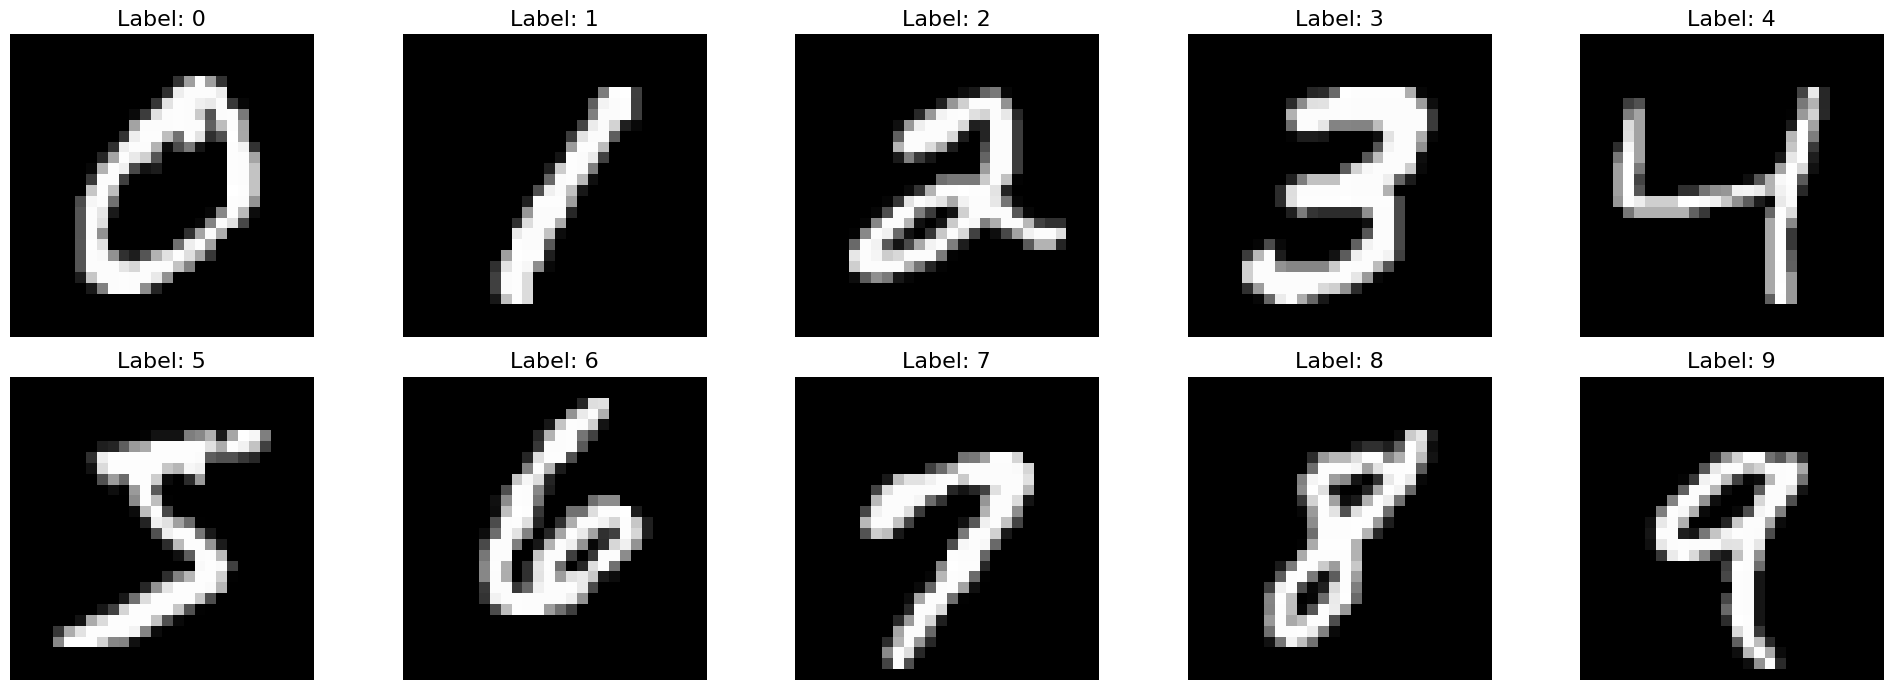

In [ ]:
#plotting all the dataset unqiue labels
unique_labels = np.unique(y_train)
unique_samples = [X_train[np.where(y_train == label)[0][0]] for label in unique_labels]

# Plot the unique labels
plt.figure(figsize=(20, 7))  # Set the figure size
for i, (img, label) in enumerate(zip(unique_samples, unique_labels)):
    plt.subplot(2, 5, i + 1)  # Create a 2x5 grid for subplots
    plt.imshow(np.reshape(img, (28, 28)), cmap='gray')  # Reshape and display the image
    plt.title(f"Label: {label}", fontsize=16)  # Add title with label
    plt.axis('off')  # Turn off axis display
plt.tight_layout()  # Adjust layout
plt.show()  # Display the figure

In [ ]:

#Plotting the percentage of each digit
train_label_counts = pd.Series(y_train).value_counts()

total_labels = train_label_counts.sum()
percentage_labels = (train_label_counts / total_labels) * 100
percentage_labels = percentage_labels.map(lambda x: f"{x:.1f}%")
print("Percentage of each digit:")
print(percentage_labels)

Percentage of each digit:
1    11.2%
7    10.4%
3    10.2%
2     9.9%
9     9.9%
0     9.9%
6     9.9%
8     9.8%
4     9.7%
5     9.0%
Name: count, dtype: object


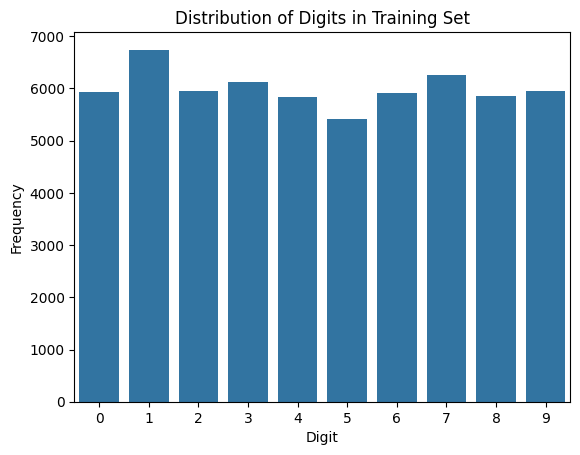

In [ ]:
#Plotting the distribution data
train_label_counts = pd.Series(y_train).value_counts()
sns.barplot(x=train_label_counts.index, y=train_label_counts.values)
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.show()

# **Preprocessing**

### **Normalization , Flatten and PCA**

---



In [ ]:
# Flatten the images from 28x28 to 784
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print("Shape of train images after flatten:", X_train.shape)
print("Shape of test images after flatten:", X_test.shape)

Shape of train images after flatten: (60000, 784)
Shape of test images after flatten: (10000, 784)


In [ ]:
print("Random data sample before normalizing the data: \n", X_train[0])

Random data sample before normalizing the data: 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 

In [ ]:
# Normalize the pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print("Random data sample after normalizing the data: \n", X_train[0])

Random data sample after normalizing the data: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.    

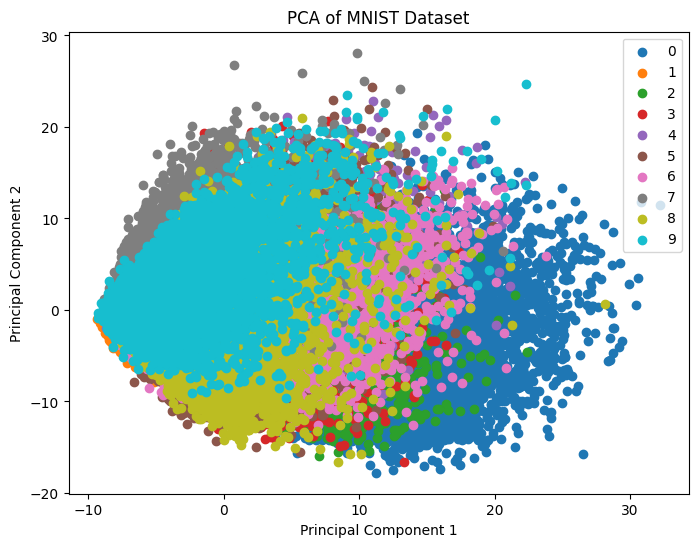

In [ ]:
# Apply PCA for visulazation
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create a DataFrame for easier plotting
df_train = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])
df_train['label'] = y_train

# Plot the data points with different colors for different labels
plt.figure(figsize=(8, 6))
for label in range(10):
    plt.scatter(
        df_train[df_train['label'] == label]['PC1'],
        df_train[df_train['label'] == label]['PC2'],
        label=str(label)
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MNIST Dataset')
plt.legend()
plt.show()


In [ ]:
#Apply PCA (Principal Component Analysis) for dimensionality reduction
pca = PCA(n_components=0.95)  # Reduce the dimensions to 50 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Function for training, testing, and evaluating the model
def train_evaluate_model(name, model, train_data, train_labels, test_data, test_labels):
    print(f'Training And Evaluating The {name} Model: ')
    model.fit(train_data, train_labels)
    model_pred = model.predict(test_data)

    print(f'Model Accuracy: {accuracy_score(test_labels, model_pred):.4f}')
    print(f'Model Recall: {recall_score(test_labels, model_pred, average="weighted"):.4f}')
    print(f'Model F1-Score: {f1_score(test_labels, model_pred, average="weighted"):.4f}')

In [ ]:
#Experiment with Different K Values
k_values = [3, 5, 7, 9, 11]

for k in k_values:
    print(f'KNN Model Evaluation using K = {k} \n')
    train_evaluate_model('KNN', KNeighborsClassifier(n_neighbors = k), X_train, y_train, X_test, y_test)
    print('---------------------------------------- \n')


KNN Model Evaluation using K = 3 

Training And Evaluating The KNN Model: 
Model Accuracy: 0.9452
Model Recall: 0.9452
Model F1-Score: 0.9450
---------------------------------------- 

KNN Model Evaluation using K = 5 

Training And Evaluating The KNN Model: 
Model Accuracy: 0.9443
Model Recall: 0.9443
Model F1-Score: 0.9441
---------------------------------------- 

KNN Model Evaluation using K = 7 

Training And Evaluating The KNN Model: 
Model Accuracy: 0.9433
Model Recall: 0.9433
Model F1-Score: 0.9431
---------------------------------------- 

KNN Model Evaluation using K = 9 

Training And Evaluating The KNN Model: 
Model Accuracy: 0.9429
Model Recall: 0.9429
Model F1-Score: 0.9428
---------------------------------------- 

KNN Model Evaluation using K = 11 

Training And Evaluating The KNN Model: 
Model Accuracy: 0.9425
Model Recall: 0.9425
Model F1-Score: 0.9423
---------------------------------------- 



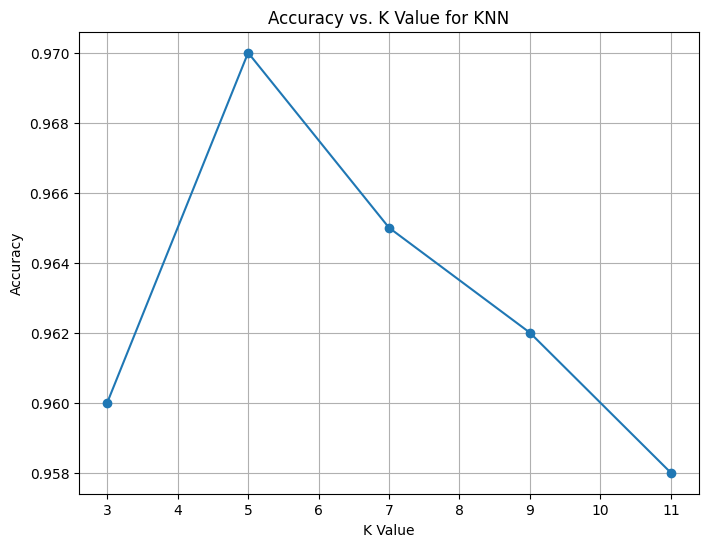

In [ ]:
k_values = [3, 5, 7, 9, 11]
accuracies = [0.96, 0.97, 0.965, 0.962, 0.958]  # Example accuracies

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. K Value for KNN')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)  # Add grid lines
plt.show()

In [ ]:
# Train KNN on the reduced data
print('Evaluate The KNN Model Using PCA \n')
knn_pca = KNeighborsClassifier(n_neighbors=5)
train_evaluate_model('KNN', knn_pca, X_train_pca, y_train, X_test_pca, y_test)


Evaluate The KNN Model Using PCA 

Training And Evaluating The KNN Model: 
Model Accuracy: 0.9486
Model Recall: 0.9486
Model F1-Score: 0.9484


In [ ]:
#SVM Model
svm = SVC(kernel='rbf', gamma='scale')
train_evaluate_model('SVM', svm, X_train,y_train,X_test,y_test)

Training And Evaluating The SVM Model: 
Model Accuracy: 0.9661
Model Recall: 0.9661
Model F1-Score: 0.9661


In [ ]:
#SVM Model Using PCA
print('Evaluate The SVM Model Using PCA \n')
train_evaluate_model('SVM', svm, X_train_pca, y_train, X_test_pca, y_test)

Evaluate The SVM Model Using PCA 

Training And Evaluating The SVM Model: 
Model Accuracy: 0.9712
Model Recall: 0.9712
Model F1-Score: 0.9712


In [ ]:
log_reg = LogisticRegression(max_iter=10000)
train_evaluate_model('Logistic Regression', log_reg, X_train,y_train,X_test,y_test)


Training And Evaluating The Logistic Regression Model: 
Model Accuracy: 0.9214
Model Recall: 0.9214
Model F1-Score: 0.9213


In [ ]:
# Logistic Regression Model Using PCA
log_reg = LogisticRegression(max_iter=10000)
print('Evaluate The Logistic Regression Model Using PCA \n')
train_evaluate_model('Logistic Regression', log_reg, X_train_pca, y_train, X_test_pca, y_test)

Evaluate The Logistic Regression Model Using PCA 

Training And Evaluating The Logistic Regression Model: 
Model Accuracy: 0.9042
Model Recall: 0.9042
Model F1-Score: 0.9039


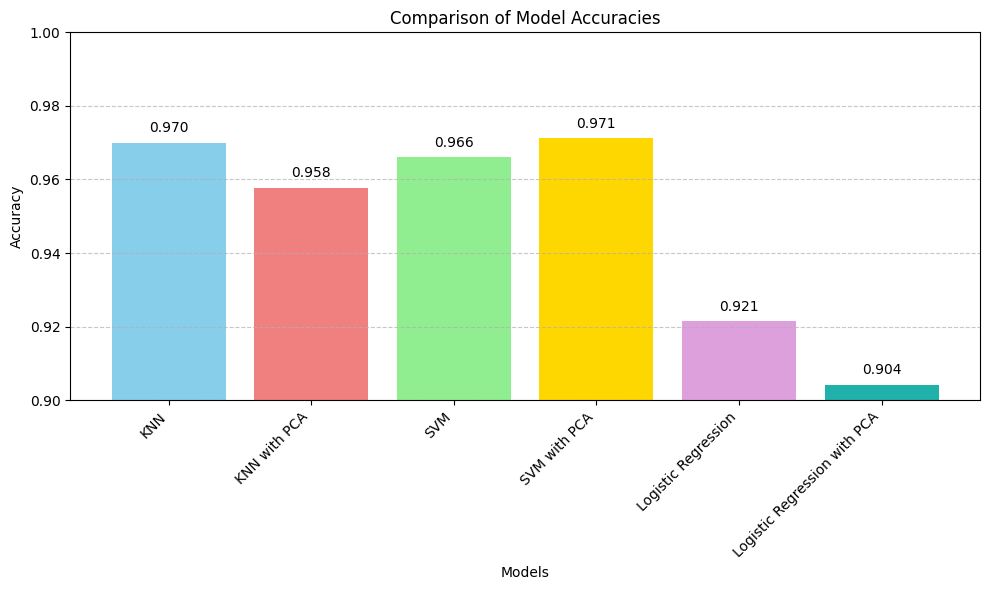

In [ ]:
models = ['KNN', 'KNN with PCA', 'SVM', 'SVM with PCA', 'Logistic Regression', 'Logistic Regression with PCA']
accuracies = [0.97, 0.9578, 0.9661, 0.9712, 0.9214, 0.9042]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'lightseagreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Accuracies")
plt.ylim(0.9, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha="right")

# Add accuracy values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.002, f"{v:.3f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
# Step 1: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 2: Set up Logistic Regression
log_reg = LogisticRegression(max_iter=10000)

# Step 3: Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strengths to test
    'penalty': ['l2'],  # Fixed to L2 regularization
}

# Step 4: Perform grid search with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# Step 5: Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Step 6: Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_pca)

# Step 7: Print evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))



Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Cross-Validation Score: 0.9193833333333332

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.88      0.89      0.88       974
           9       0.90      0.91      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Test Accuracy: 0.9237


Model Deployment For GUI Uses

In [ ]:
import joblib
joblib.dump(knn_pca, 'knn_model.pkl')
joblib.dump(svm, 'svm_model.pkl')

['svm_model.pkl']

Testing Models on New Data

In [ ]:
#Loading The Models
svm_model = joblib.load('D:/py venv/svm_model.pkl')
knn_model = joblib.load('D:/py venv/knn_model.pkl')


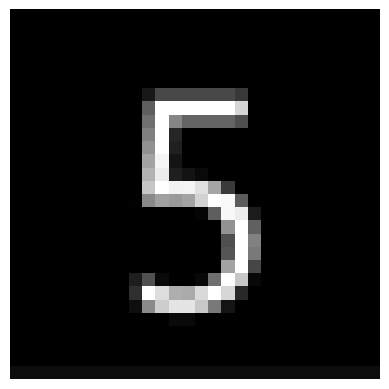

Predicted Label: 5


In [ ]:
from PIL import Image, ImageOps
import numpy as np

image_path = "C:/Users/Ahmed/Desktop/5.png"
image = Image.open(image_path)
image = image.resize((28, 28)).convert('L')  # Resize and convert to grayscale
image_array = np.array(image)
if np.mean(image_array) > 127:
    image = ImageOps.invert(image)
image_array = np.array(image).astype('float32') / 255.0  # Normalize
image_vector = image_array.flatten()  # Flatten the image

plt.imshow(np.reshape(image_array, (28, 28)), cmap='gray')
plt.axis('off')
plt.show()

image_pca = pca.transform([image_vector])

predicted_label = svm_model.predict(image_pca)
print(f"Predicted Label: {predicted_label[0]}")